# Dynamic Programming I

* DP = Recursive call + Memoization <br> 
* Complete search 를 효율적으로 수행가능하고, 점화식을 찾을 수 있으면 일정 조건 아래에서 DP 문제로 치환 가능. 
* 일정 조건: <br>
1) 중복 부분 문제: 큰 문제는 작은 문제로 쪼개어 질 수 있음 (순환적 관계; recurrence) <br>
2) 최적 부분 문제 구조 (=최적화의 원칙 만족): 부분 문제의 해로 큰 문제의 해를 구할 수 있음. 분할 정복과의 차이? 분할 정복은 부분 문제를 재귀적으로 해결하는 점은 같지만, 부분 문제의 해가 큰 문제에 중복 되어 사용되진 않음. 그러나, DP는 부분 문제의 해가 큰 문제의 해에 중복되어 사용 된다. 예) 최장 경로 문제. <br>

* DP는 어떻게 설계? <br>
1) 문제를 부분 문제로 쪼갬 <br>
2) 부분 문제 최적해 $\rightarrow$ 큰 문제 최적해: 점화식으로 표현 (Recursive call) <br>
3) 상향식으로 큰 문제의 최적해를 구함 (Memoization 활용) <br>


<div>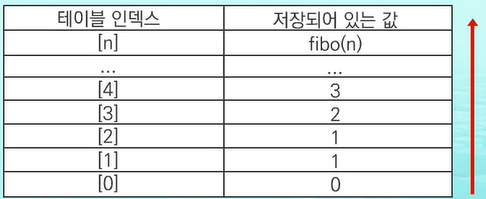</div>

* Contents of DP I:
 * 1) Fibnoacci Sequence
 * 2) Coin Exchange
 * 3) Binomial Coefficients

<bold>Reference: Samsung SW Expert Academy (저작권 문제가 생길 시 내리도록 하겠습니다.)</bold>


## 1) Fibonacci Sequence 

### 1-1) Recursive call

<div>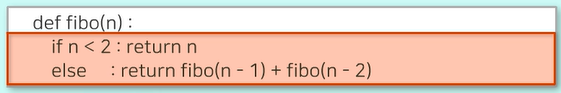</div>

In [6]:
def FiboRecursiveCall(n):
    if n < 2:
        return n
    else:
        return FiboRecursiveCall(n-1) + FiboRecursiveCall(n-2) 

### 1-2) Memoization 

<div>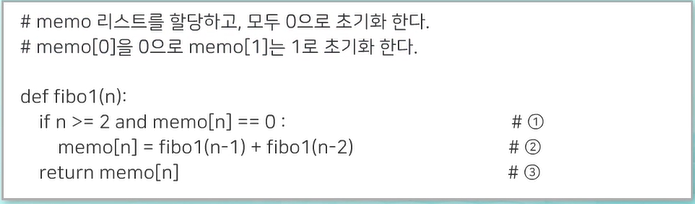</div>

* 여전히 불필요한 function call이 발생하여, 실행 속도 저하 혹은 overflow 문제 발생
* 추가적인 메모리 공간 필요

In [19]:
def FiboMemoSub(n, memo):
    if n>=2  and memo[n] == 0:
        memo[n] = FiboMemoSub(n-1, memo) + FiboMemoSub(n-2, memo)
    return memo[n]

def FiboMemo(n):
    memo = [0] * (n+1)
    memo[0], memo[1] = 0, 1
    return FiboMemoSub(n, memo)

### 1-3) DP 

<div>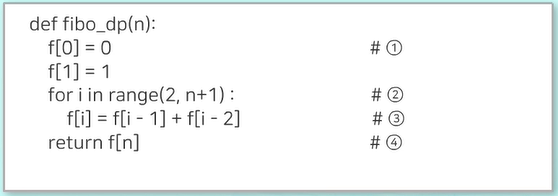</div>

* $T(n)=n+1$

In [13]:
def FiboDP(n):
    fibo = [0] * (n + 1)
    fibo[0], fibo[1] = 0, 1
    
    for idx in range(2, n+1):
        fibo[idx] = fibo[idx - 1] + fibo[idx -2]
    
    return fibo[n]

### 1-4) Comparison of 3 cases: Recursive call, Memoization, and DP

Time complexity of each cases:
1) Recursive call: $T(n) = 2^{n/2}$ <br>
2) Memoization: $T(n) = n+1$ <br>
3) DP: $T(n) = n+1$ 

In [43]:
import time

n = 20

algorithms = {"Recursive call":FiboRecursiveCall,
              "Memoization":FiboMemo,
              "DP":FiboDP,}
print("Ex.1 Fibonacci Sequence of n = %d" %(n))
print("{:<20} {:<20} {:<20}".format("Algorithm", "Results", "Elpased Time"))

for name, func in algorithms.items():
    start = time.time()
    result = func(n)
    end = time.time()
    elapsed_time = end - start
    print("{:<20} {:<20} {:<20}".format(name, str(result), str(elapsed_time)))

Ex.1 Fibonacci Sequence of n = 20
Algorithm            Results              Elpased Time        
Recursive call       6765                 0.006322622299194336
Memoization          6765                 1.0967254638671875e-05
DP                   6765                 5.0067901611328125e-06


## 2) Coin Exchange

Problem Definition: 지급 가능한 코인 $\{v_{1},...,v_{n}\}$ 이 있고 코인의 수에 제한이 없다고 할 때, 코인을 사용하여 총 $V$의 거스름돈을 건내주려고 한다. 최소의 수의 코인을 사용하여 거스름돈을 건내줄 때, 필요한 최소 동전의 수를 구하시오. <br>
Examples: <br>
* coin set = $\{1,4,6\}$, exchange = $8$
* solutions:
 * greedy algorithm's optimal soluiton = $\{6,1,1\}$
 * global optimal solution = $\{4,4\}$
 * complete search = $\{4,4\}$
 * DP = $\{4,4\}$

### 2-1) Recursive call

* How to design? <br>
1) 1원 지불 + 재귀 호출 <br>
2) 4원 지불 + 재귀 호출 <br>
3) 6원 지불 + 재귀 호출 <br>

* 상태 공간 트리: overlapped function call
<div>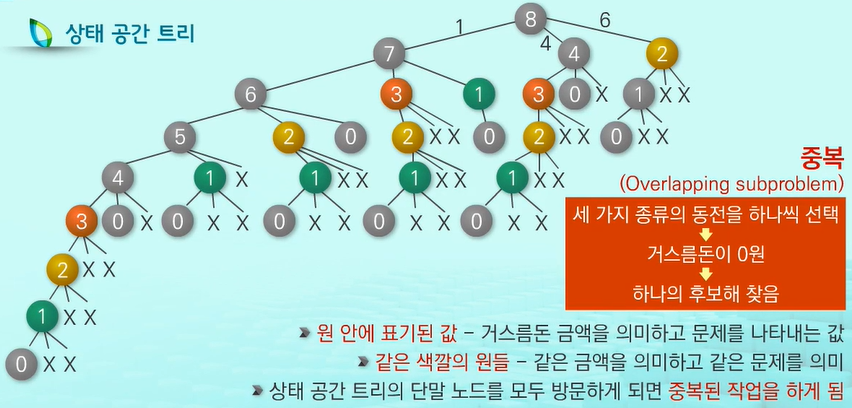</div>


In [1]:
def CoinChangeRecursiveCall(coin, change, min_coins=-1):
    min_coins = int(change/min(coin))+1
    if change < min(coin):
        return 0
    else:
        for c in coin:
            if change - c >= 0:
                sub_optimal = CoinChangeRecursiveCall(coin, change - c, min_coins)
                if sub_optimal < min_coins:
                    min_coins = sub_optimal
                    min_coins += 1
    return min_coins

### 2-2) memoization

<div>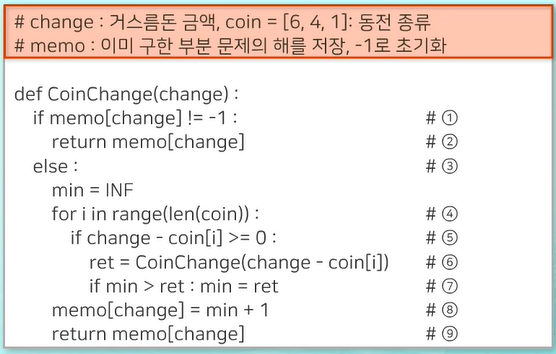</div>

In [6]:
def CoinChangeMemoSub(coin, change, memo, ub):
    if memo[change] != 0:
        return memo[change]
    else:
        min_coins = ub
        for c in coin:
            if change - c >= 0:
                ret = CoinChangeMemoSub(coin, change-c, memo, ub)
                if min_coins > ret:
                    min_coins = ret
        if min_coins < ub:
            memo[change] = min_coins + 1
        return memo[change]
                    
def CoinChangeMemo(coin, change):
    memo = [0] * (change+1)
    ub = int(change/min(coin)) + 1
    return CoinChangeMemoSub(coin, change, memo, ub)

### 2-3) DP

<div>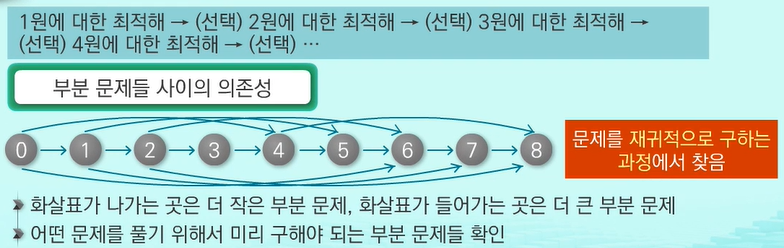</div>
$f(n) = \text{min}\{f(n-6), f(n-4), f(n-1)\}+1$
<table><tr>
<td><div>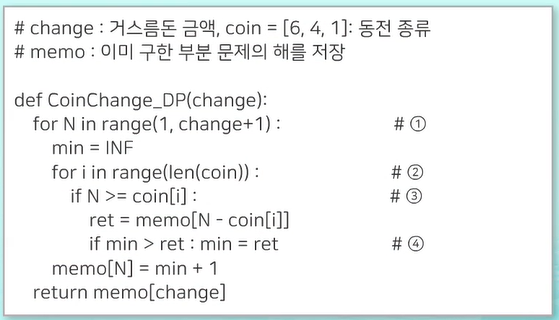</div>
<td><div>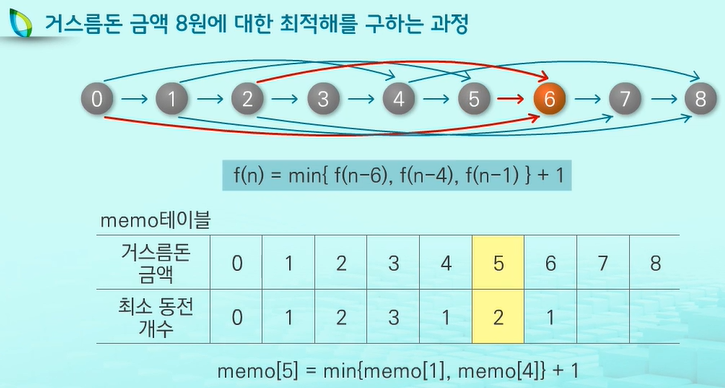</div>
</tr><table>

In [28]:
def CoinChangeDP(coin, change):
    memo = [0] * (change+1)
    ub = int(change/min(coin))+1
    
    for ch in range(change+1):
        min_coins = ub
        for c in coin:
            if ch >= c:
                ret = memo[ch-c]
                if min_coins > ret:
                    min_coins = ret
        if min_coins < ub:
            memo[ch] = min_coins + 1 
    return memo[change]

### 2-4) Comparison of 3 cases: Recursive call, Memoization, and DP


In [29]:
import time

#coin = [1,4,6]
#change = 32
coin = [1,4,6]
change = 6

algorithms = {"Recursive call":CoinChangeRecursiveCall,
              "Memoization":CoinChangeMemo,
              "DP":CoinChangeDP,
             }
print("Ex.2 Coin exchange of coin = %s, exchange = %d" %(str(coin), change))
print("{:<20} {:<20} {:<20}".format("Algorithm", "Results", "Elpased Time"))

for name, func in algorithms.items():
    start = time.time()
    result = func(coin, change)
    end = time.time()
    elapsed_time = end - start
    print("{:<20} {:<20} {:<20}".format(name, str(result), str(elapsed_time)))

Ex.2 Coin exchange of coin = [1, 4, 6], exchange = 6
Algorithm            Results              Elpased Time        
Recursive call       1                    2.2172927856445312e-05
Memoization          1                    1.33514404296875e-05
DP                   1                    6.9141387939453125e-06


### 2-5) Advanced problem

"필요한 최소 동전의 수 $\rightarrow$ 필요한 최소 동전의 수와 조합"을 구하시오.

## 3) Binomial coefficient

$\dbinom{n}{k} = \cfrac{n!}{k!(n-k)!} (0 \leq k \leq n)$ <br>
The above equation can be regresented as follows:<br>
$\dbinom{n}{k} = \dbinom{n-1}{k-1} + \dbinom{n-1}{k}$ and $\dbinom{n}{n}=\dbinom{n}{0}=1$ <br><br>

<div>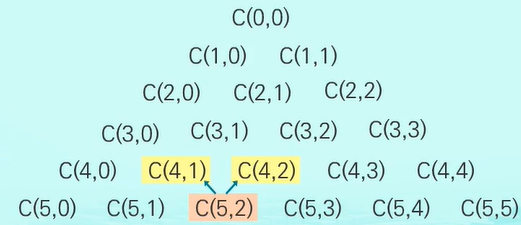</div>

### 3-1) Recursive call
<table><tr>
<td><div>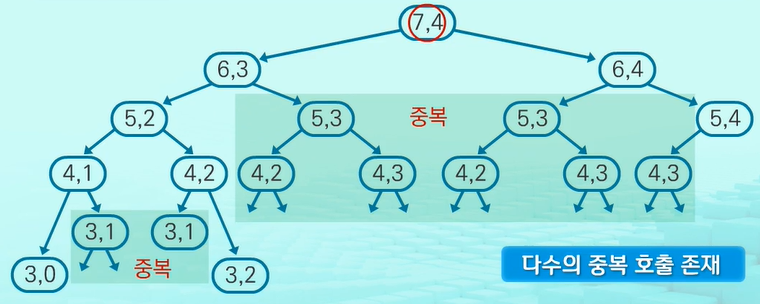</div>
<td><div>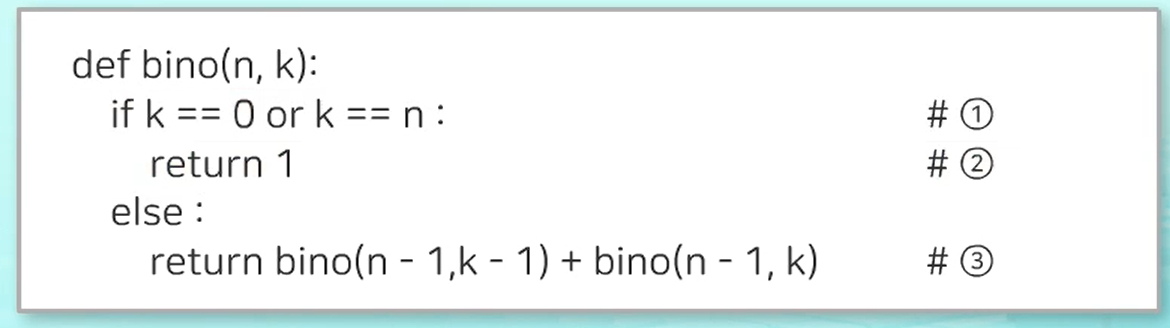</div>
</tr></table>

In [121]:
def BinoCoeffRecursiveCall(n, k):
    if k == 0 or k == n:
        return 1
    else:
        return BinoCoeffRecursiveCall(n-1,k-1) + BinoCoeffRecursiveCall(n-1,k)

### 3-2) memoization
<div>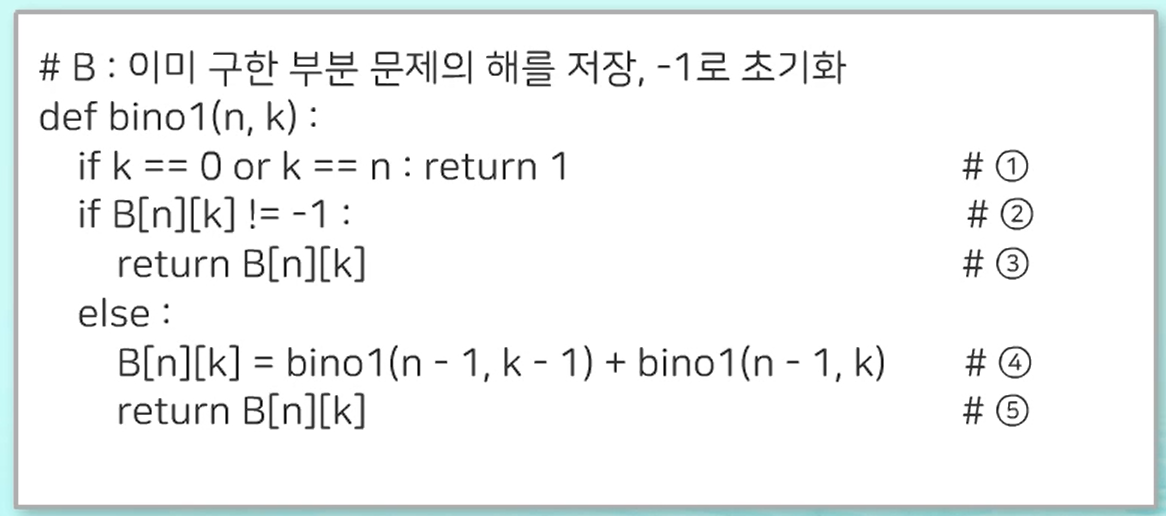</div>

In [185]:
def BinoCoeffMemoSub(n,k,memo):
    if memo[n][k] > 0:
        return memo[n][k]
    if k==0 or k==n:
        memo[n][k] = 1
        return memo[n][k]
    else:
        memo[n][k] = BinoCoeffMemoSub(n-1,k-1,memo) + BinoCoeffMemoSub(n-1,k,memo)
        # what if memo[n][k] = BinoCoeffMemoSub(n-1,k,memo) + BinoCoeffMemoSub(n-1,k-1,memo)?
        return memo[n][k]

def BinoCoeffMemo(n, k):
    memo = [[0]*(k+1) for _ in range(n+1)]
    x = BinoCoeffMemoSub(n,k,memo)
    return x

### 3-3) DP

<table><tr>
<td><div>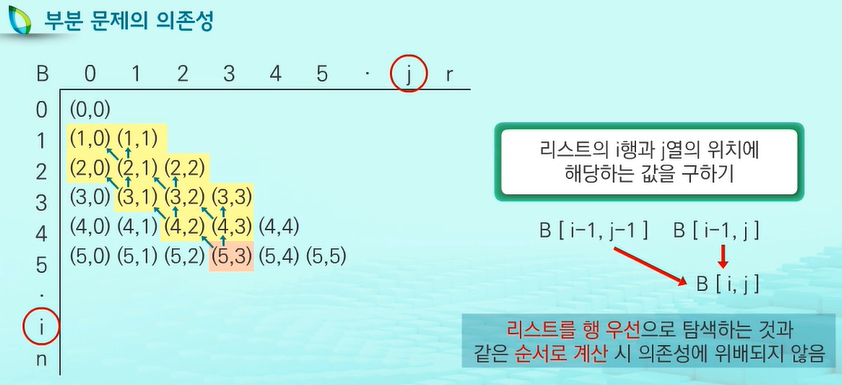</div>
<td><div>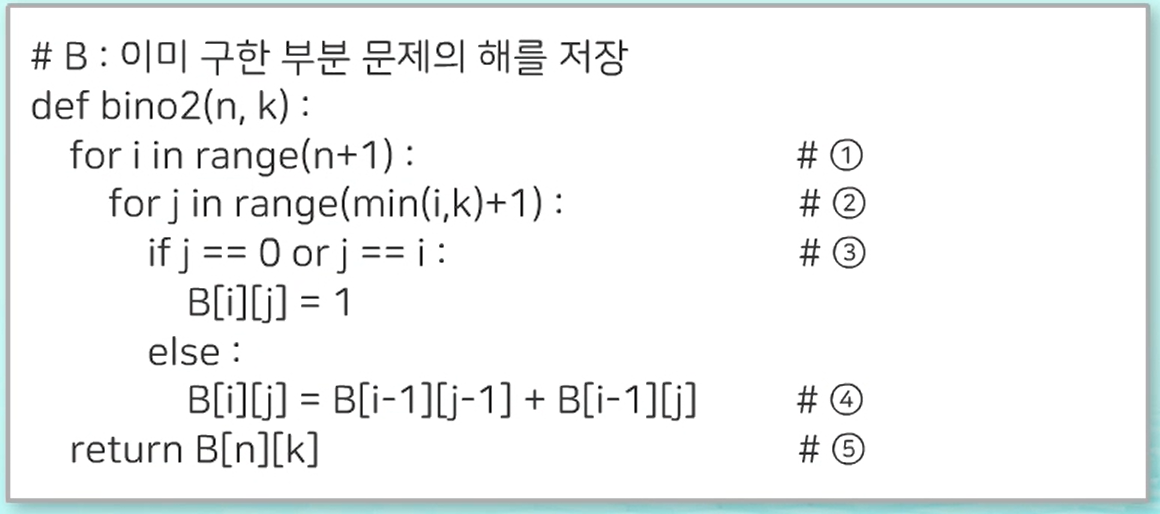</div>
</tr><table>

In [199]:
def BinoCoeffDP(n,k):
    memo = [[0]*(k+1) for _ in range(n+1)]
    for i in range(n+1):
        for j in range(k+1):
            if j==0 or j==i:
                memo[i][j] = 1
            else:
                memo[i][j] = memo[i-1][j-1] + memo[i-1][j]
    return memo[n][k]

### 3-4) Comparison of 3 cases: Recursive call, Memoization, and DP

Time complexity of each cases:
1) Recursive call: $T(n) = 2^{n/2}$ <br>
2) Memoization: $T(n) = n+1$ <br>
3) DP: $T(n) = n+1$ 

In [202]:
import time

n, k = 26,8

algorithms = {"Recursive call":BinoCoeffRecursiveCall,
              "Memoization":BinoCoeffMemo,
              "DP":BinoCoeffDP,
             }
print("Ex.3 %d choose %d" %(n,k))
print("{:<20} {:<20} {:<20}".format("Algorithm", "Results", "Elpased Time"))

for name, func in algorithms.items():
    start = time.time()
    result = func(n, k)
    end = time.time()
    elapsed_time = end - start
    print("{:<20} {:<20} {:<20}".format(name, str(result), str(elapsed_time)))

Ex.3 26 choose 8
Algorithm            Results              Elpased Time        
Recursive call       1562275              0.36687684059143066 
Memoization          1562275              0.00010895729064941406
DP                   1562275              6.723403930664062e-05


## Ex. 1) 타일 붙히기

다음과 같이 2x1, 2x2, 2x3 크기의 타일을 2xN 크기의 공간에 붙이려고 한다. N이 주어지면 붙이는 방법이 모두 몇 가지가 경우가 있는지 출력하는 프로그램을 만드시오. 예를 들어 N이 3인 경우 타일을 붙이는 방법은 다음과 같다.


<div>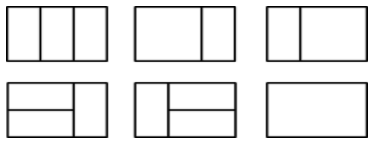</div>


[입력] 첫 줄에 테스트 케이스의 개수 T가 주어지고, 테스트 케이스 별로 N이 주어진다. 3<=N<=30 <br>
[출력] 각 줄마다 "#T" (T는 테스트 케이스 번호)를 출력한 뒤, 테스트 케이스에 대한 답을 출력한다.

입/출력 예시:
<div>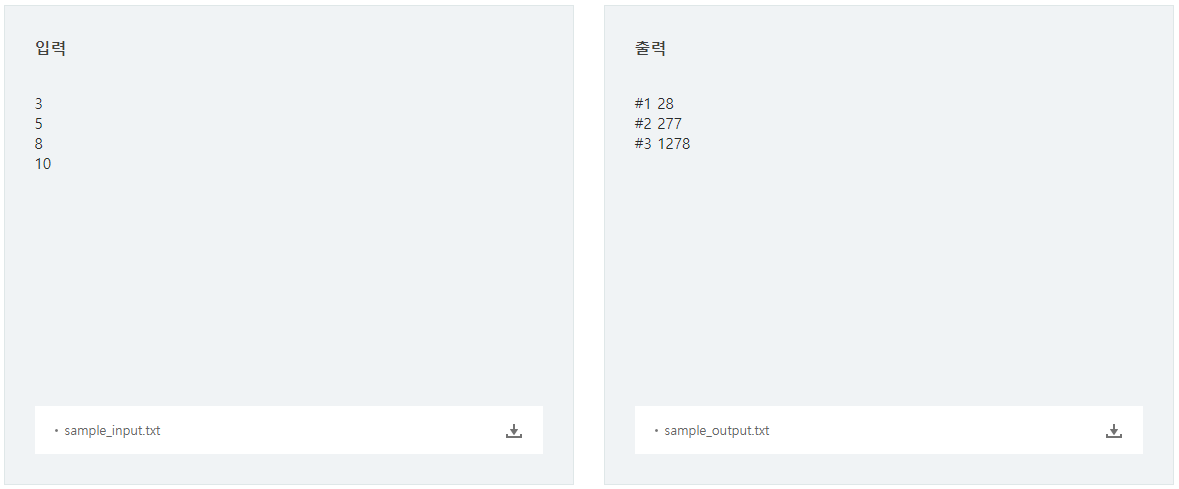</div>

## Ex. 2) 이항계수

$n, a, b$가 주어지면 $(x+y)^n$에서 $x^a y^b$의 계수를 구하는 프로그램을 작성하라. 예를 들어 $n, a, b$가 $2, 1, 1$인 경우 $(x+y)^2 = x^2 + 2xy + y^2$이 되고, $xy$의 계수는 $2$이다.

[입력] 첫 줄에 테스트 케이스의 개수 T가 주어지고, 테스트 케이스 별로 $n, a, b$가 주어진다. 입력으로 존재하지 않는 $x^a y^b$의 계수는 주어지지 않는다. (입력은 항상 $a+b=n$을 만족) ($0 \leq n, a, b \leq 70$ ) <br>
[출력] 각 줄마다 "#T" (T는 테스트 케이스 번호)를 출력한 뒤, 테스트 케이스에 대한 답을 출력한다.


<div>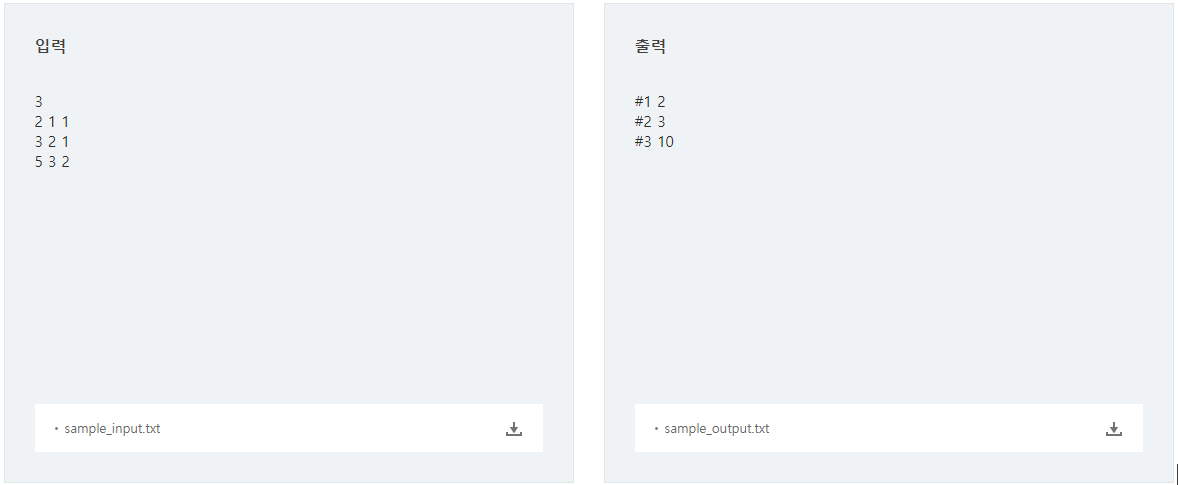</div>